# About

On this notebook we setup the last and complete steps for the pipeline.

In [198]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
# Definitions

REGION = "Urquiza2"

In [200]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

import tools

In [201]:
subset = tools.load_subset(REGION)
subset

Subset Urquiza2 loaded with 1086 entries.


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.572169,-58.479556,57.4190,0.7083,"POLYGON((-58.4794921438802 -34.5721601454282, ...",48Q3CGHC+45P6
1,-34.569106,-58.479217,29.0929,0.6858,"POLYGON((-58.4792210834666 -34.5690687082475, ...",48Q3CGJC+983J
2,-34.571453,-58.478751,44.3740,0.7688,"POLYGON((-58.4787013258147 -34.5714693455408, ...",48Q3CGHC+CF9X
3,-34.569643,-58.478963,37.6115,0.7070,"POLYGON((-58.4789168205117 -34.5696560287902, ...",48Q3CGJC+4CV6
4,-34.571292,-58.479805,17.9762,0.6747,"POLYGON((-58.47978642667 -34.5712691118022, -5...",48Q3CGHC+F3P6
...,...,...,...,...,...,...
1081,-34.570530,-58.478305,80.9137,0.8190,"POLYGON((-58.4783080188978 -34.570469735118, -...",48Q3CGHC+QMPR
1082,-34.569310,-58.478409,10.7655,0.6696,"POLYGON((-58.4783864035088 -34.5693189545079, ...",48Q3CGJC+7JGQ
1083,-34.571372,-58.480055,31.7370,0.6882,"POLYGON((-58.4800126026917 -34.571380715999, -...",48Q3CGH9+FX42
1084,-34.570483,-58.476648,79.2671,0.8296,"POLYGON((-58.4765771641884 -34.570480787708, -...",48Q3CGHF+R85M


In [202]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.572169,-58.479556,57.4190,0.7083,"POLYGON ((-58.47949 -34.57216, -58.47953 -34.5...",48Q3CGHC+45P6
1,-34.569106,-58.479217,29.0929,0.6858,"POLYGON ((-58.47922 -34.56907, -58.47926 -34.5...",48Q3CGJC+983J
2,-34.571453,-58.478751,44.3740,0.7688,"POLYGON ((-58.4787 -34.57147, -58.47875 -34.57...",48Q3CGHC+CF9X
3,-34.569643,-58.478963,37.6115,0.7070,"POLYGON ((-58.47892 -34.56966, -58.47896 -34.5...",48Q3CGJC+4CV6
4,-34.571292,-58.479805,17.9762,0.6747,"POLYGON ((-58.47979 -34.57127, -58.47983 -34.5...",48Q3CGHC+F3P6
...,...,...,...,...,...,...
1081,-34.570530,-58.478305,80.9137,0.8190,"POLYGON ((-58.47831 -34.57047, -58.47837 -34.5...",48Q3CGHC+QMPR
1082,-34.569310,-58.478409,10.7655,0.6696,"POLYGON ((-58.47839 -34.56932, -58.4784 -34.56...",48Q3CGJC+7JGQ
1083,-34.571372,-58.480055,31.7370,0.6882,"POLYGON ((-58.48001 -34.57138, -58.48005 -34.5...",48Q3CGH9+FX42
1084,-34.570483,-58.476648,79.2671,0.8296,"POLYGON ((-58.47658 -34.57048, -58.47663 -34.5...",48Q3CGHF+R85M


<Axes: >

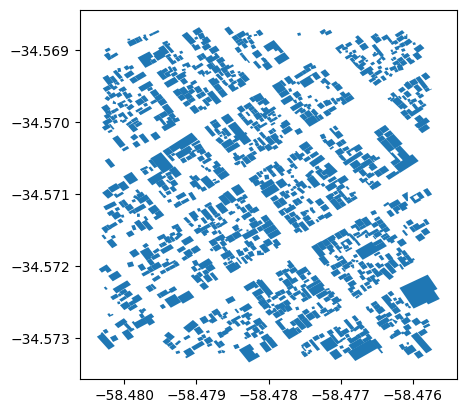

In [203]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [204]:
long_area_center, lat_area_center = tools.get_area_center(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.478038350000006, -34.57098098


In [205]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells
0,-34.572169,-58.479556,57.4190,0.7083,"POLYGON ((-58.47949 -34.57216, -58.47953 -34.5...",48Q3CGHC+45P6,-0.001188,-0.001517,-17,-14,1
1,-34.569106,-58.479217,29.0929,0.6858,"POLYGON ((-58.47922 -34.56907, -58.47926 -34.5...",48Q3CGJC+983J,0.001875,-0.001178,-14,20,1
2,-34.571453,-58.478751,44.3740,0.7688,"POLYGON ((-58.4787 -34.57147, -58.47875 -34.57...",48Q3CGHC+CF9X,-0.000472,-0.000713,-8,-6,1
3,-34.569643,-58.478963,37.6115,0.7070,"POLYGON ((-58.47892 -34.56966, -58.47896 -34.5...",48Q3CGJC+4CV6,0.001338,-0.000924,-11,14,1
4,-34.571292,-58.479805,17.9762,0.6747,"POLYGON ((-58.47979 -34.57127, -58.47983 -34.5...",48Q3CGHC+F3P6,-0.000311,-0.001767,-20,-4,1
...,...,...,...,...,...,...,...,...,...,...,...
1081,-34.570530,-58.478305,80.9137,0.8190,"POLYGON ((-58.47831 -34.57047, -58.47837 -34.5...",48Q3CGHC+QMPR,0.000451,-0.000267,-3,5,1
1082,-34.569310,-58.478409,10.7655,0.6696,"POLYGON ((-58.47839 -34.56932, -58.4784 -34.56...",48Q3CGJC+7JGQ,0.001671,-0.000371,-5,18,1
1083,-34.571372,-58.480055,31.7370,0.6882,"POLYGON ((-58.48001 -34.57138, -58.48005 -34.5...",48Q3CGH9+FX42,-0.000391,-0.002017,-23,-5,1
1084,-34.570483,-58.476648,79.2671,0.8296,"POLYGON ((-58.47658 -34.57048, -58.47663 -34.5...",48Q3CGHF+R85M,0.000498,0.001390,15,5,1


In [206]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 50/50 [00:00<00:00, 287.93it/s]


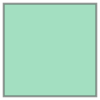

In [207]:
poly_grid[0][0]

In [208]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 1086/1086 [00:00<00:00, 1957.84it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells,overlapping
0,-34.572169,-58.479556,57.4190,0.7083,"POLYGON ((-58.47949 -34.57216, -58.47953 -34.5...",48Q3CGHC+45P6,-0.001188,-0.001517,-17,-14,1,"[{'cell_long_pos': -18, 'cell_lat_pos': -14, '..."
1,-34.569106,-58.479217,29.0929,0.6858,"POLYGON ((-58.47922 -34.56907, -58.47926 -34.5...",48Q3CGJC+983J,0.001875,-0.001178,-14,20,1,"[{'cell_long_pos': -14, 'cell_lat_pos': 20, 'a..."
2,-34.571453,-58.478751,44.3740,0.7688,"POLYGON ((-58.4787 -34.57147, -58.47875 -34.57...",48Q3CGHC+CF9X,-0.000472,-0.000713,-8,-6,1,"[{'cell_long_pos': -9, 'cell_lat_pos': -6, 'ar..."
3,-34.569643,-58.478963,37.6115,0.7070,"POLYGON ((-58.47892 -34.56966, -58.47896 -34.5...",48Q3CGJC+4CV6,0.001338,-0.000924,-11,14,1,"[{'cell_long_pos': -11, 'cell_lat_pos': 14, 'a..."
4,-34.571292,-58.479805,17.9762,0.6747,"POLYGON ((-58.47979 -34.57127, -58.47983 -34.5...",48Q3CGHC+F3P6,-0.000311,-0.001767,-20,-4,1,"[{'cell_long_pos': -20, 'cell_lat_pos': -4, 'a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1081,-34.570530,-58.478305,80.9137,0.8190,"POLYGON ((-58.47831 -34.57047, -58.47837 -34.5...",48Q3CGHC+QMPR,0.000451,-0.000267,-3,5,1,"[{'cell_long_pos': -4, 'cell_lat_pos': 4, 'are..."
1082,-34.569310,-58.478409,10.7655,0.6696,"POLYGON ((-58.47839 -34.56932, -58.4784 -34.56...",48Q3CGJC+7JGQ,0.001671,-0.000371,-5,18,1,"[{'cell_long_pos': -5, 'cell_lat_pos': 18, 'ar..."
1083,-34.571372,-58.480055,31.7370,0.6882,"POLYGON ((-58.48001 -34.57138, -58.48005 -34.5...",48Q3CGH9+FX42,-0.000391,-0.002017,-23,-5,1,"[{'cell_long_pos': -23, 'cell_lat_pos': -5, 'a..."
1084,-34.570483,-58.476648,79.2671,0.8296,"POLYGON ((-58.47658 -34.57048, -58.47663 -34.5...",48Q3CGHF+R85M,0.000498,0.001390,15,5,1,"[{'cell_long_pos': 14, 'cell_lat_pos': 5, 'are..."


In [209]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [210]:
intersections = tools.build_intersections_df(subset)
intersections

,cell_long_pos,cell_lat_pos,area,polygon_tag,fraction_of_the_building,fraction_over_building,fraction_over_buildings_in_cell
0,-18,-14,2.204880e-09,48Q3CGHC+45P6,0.390947,NaN,1.000000
1,-18,-13,1.557702e-11,48Q3CGHC+45P6,0.002762,NaN,0.005886
2,-17,-14,2.460120e-09,48Q3CGHC+45P6,0.436203,NaN,1.000000
3,-17,-13,9.592705e-10,48Q3CGHC+45P6,0.170088,NaN,0.476446
4,-14,20,1.269055e-09,48Q3CGJC+983J,0.444118,NaN,0.264452
...,...,...,...,...,...,...,...
4402,16,5,4.904768e-10,48Q3CGHF+R85M,0.062997,NaN,0.082446
4403,8,-17,1.473585e-10,48Q3CGHF+247Q,0.030828,NaN,0.061350
4404,9,-17,4.585497e-09,48Q3CGHF+247Q,0.959297,NaN,0.888099
4405,9,-16,2.920759e-11,48Q3CGHF+247Q,0.006110,NaN,0.004459


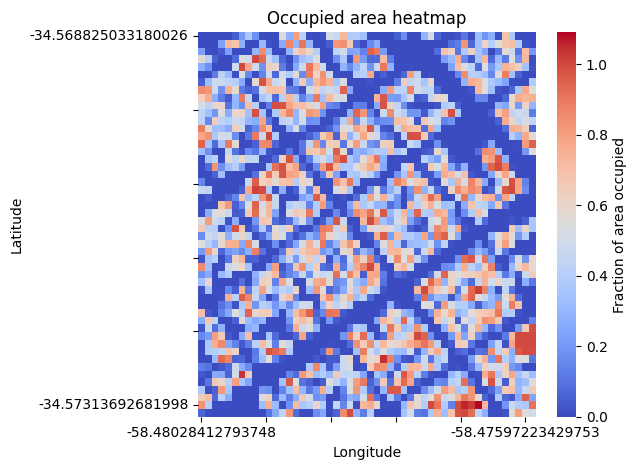

In [211]:
tools.plot_occupied_area_heatmap(intersections, lat_area_center=lat_area_center, long_area_center=long_area_center, save_as="test.png")

In [212]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

cell_composition
cell_long_pos cell_lat_pos                                                   
-25           -25           [{'polygon_tag': '48Q3CGG9+QVQH', 'fraction_ov...
              -24           [{'polygon_tag': '48Q3CGG9+QVQH', 'fraction_ov...
              -23           [{'polygon_tag': '48Q3CGG9+QVQH', 'fraction_ov...
              -22           [{'polygon_tag': '48Q3CGG9+QVQH', 'fraction_ov...
              -21           [{'polygon_tag': '48Q3CGG9+RVQW', 'fraction_ov...
...                                                                       ...
 24            17           [{'polygon_tag': '48Q3CGJF+6J9X', 'fraction_ov...
               18           [{'polygon_tag': '48Q3CGJF+7M38', 'fraction_ov...
               20           [{'polygon_tag': '48Q3CGJF+9J8J', 'fraction_ov...
               21           [{'polygon_tag': '48Q3CGJF+9J8J', 'fraction_ov...
               22           [{'polygon_tag': '48Q3CGJF+CJ4P', 'fraction_ov...

[1959 rows x 1 columns]

In [213]:
cell_composition.loc[-25,-25].values

array([list([{'polygon_tag': '48Q3CGG9+QVQH', 'fraction_over_buildings_in_cell': 1.0, 'fraction_of_the_building': 0.02021864842925686}])],
      dtype=object)